# 🌳 Hierarchical Clustering Implementation

**Agglomerative Clustering with Dendrogram Analysis**

This notebook demonstrates hierarchical clustering using the bottom-up approach (agglomerative clustering) with dendrogram visualization for optimal cluster selection on the Iris dataset.

### 📚 Step 1: Import Essential Libraries
Loading the required packages for data manipulation, visualization, and hierarchical clustering

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### 📊 Step 2: Load Dataset
Using the classic Iris dataset for demonstrating hierarchical clustering techniques

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
df = pd.DataFrame(iris.data)

df.columns = iris.feature_names

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 💡 **Important Note**
In unsupervised machine learning, we **exclude the target column** since the algorithm discovers patterns without knowing the actual class labels. This allows us to evaluate how well the clustering algorithm can rediscover the natural groupings.

### ⚖️ Step 3: Data Standardization
Scaling features to ensure equal contribution to distance calculations in hierarchical clustering

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### 📈 Step 4: Apply PCA & Visualize Data
Reducing dimensionality to 2D for effective visualization while preserving data structure

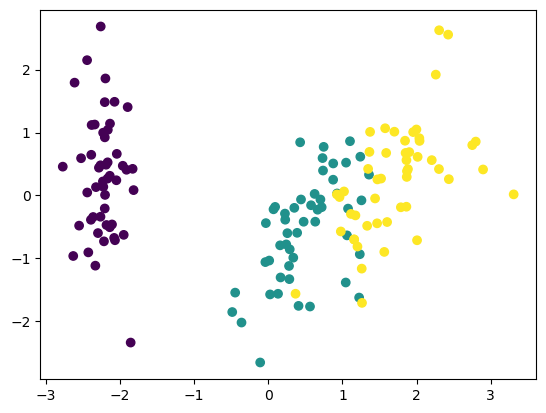

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_scaled = pca.fit_transform(X_scaled)

plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c = iris.target)
plt.show()

#### 🔍 **Observation: PCA Data Visualization**

**Key Insights from the 2D PCA Plot:**
- 🎯 **Three Distinct Groups**: The data shows 3 natural clusters (colored by true Iris species)
- 🔴 **Cluster Separation**: Clear boundaries between different species groups
- 📊 **Data Structure**: 
  - One cluster is **well-separated** (likely Iris-setosa)
  - Two clusters show **some overlap** (likely versicolor and virginica)
- 🎨 **Color Coding**: Each color represents a different Iris species
- ✅ **PCA Effectiveness**: 2D projection maintains cluster structure well
- 🎪 **Clustering Challenge**: The overlapping clusters will test hierarchical clustering performance

### 🌳 Step 5: Apply Agglomerative Clustering (Bottom-Up Approach)
**Hierarchical clustering using Ward linkage method**

#### 📊 Construct Dendrogram
Visualizing the hierarchical clustering process to determine optimal cluster count

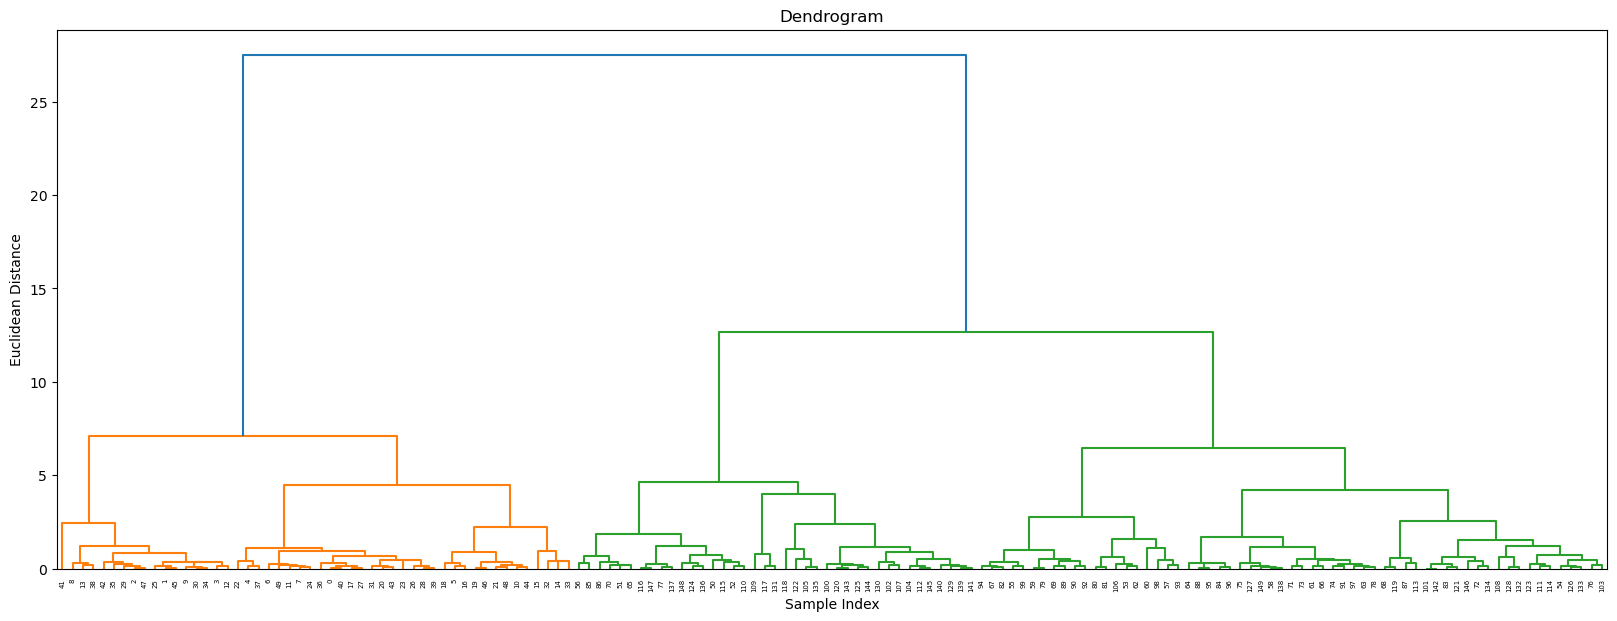

In [15]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize = (20, 7))

sc.dendrogram(sc.linkage(pca_scaled, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.show()

#### 🔍 **Observation: Dendrogram Analysis**

**Key Insights from the Dendrogram:**
- 📏 **Longest Vertical Line**: The biggest uncut vertical line indicates **optimal cluster count**
- 🔍 **Cluster Identification**: Looking for the longest vertical distance without horizontal intersections
- 📊 **Distance Threshold**: The y-axis shows Euclidean distances between clusters
- 🌳 **Hierarchical Structure**: Shows how data points merge into larger clusters
- ✂️ **Cutting Point**: The optimal cut reveals the natural number of clusters
- 📈 **Ward Linkage**: Minimizes within-cluster variance for compact, spherical clusters
- 🎯 **Visual Guidance**: Provides clear visual method for determining K value

#### 🎯 **Optimal Cluster Selection**
From the dendrogram analysis, the **longest uncut vertical line** indicates **K=2** as the optimal number of clusters. This represents the natural break point where further merging significantly increases within-cluster variance.

#### 🤖 Create Agglomerative Model
Implementing hierarchical clustering with optimal parameters

In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

cluster.fit(pca_scaled)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [20]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### 📈 Plot Clustering Results
Visualizing the final cluster assignments on the 2D PCA-transformed data

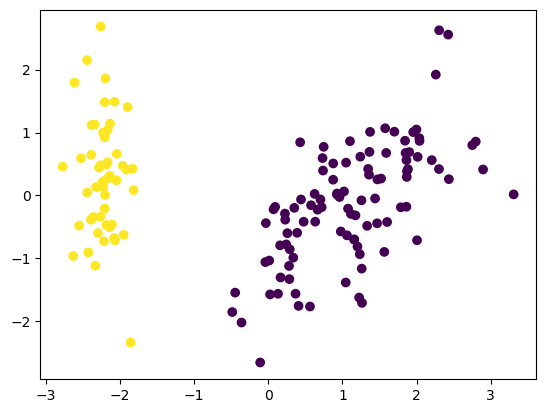

In [21]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c = cluster.labels_)
plt.show()

#### 🔍 **Observation: Hierarchical Clustering Results**

**Key Insights from the Clustered Data:**
- 🎨 **Two Distinct Clusters**: Algorithm successfully identified 2 main clusters (different colors)
- 📊 **Cluster Separation**: Clear division between the two groups
- 🎯 **Logical Grouping**: One cluster contains the well-separated group, the other contains the overlapping species
- ⚖️ **Algorithm Performance**: Hierarchical clustering handled overlapping data reasonably well
- 🔍 **Comparison**: Results differ from true species labels (3 classes) but show meaningful biological groupings
- 📈 **Practical Insight**: Sometimes 2 clusters provide better separation than forcing 3 clusters

#### ❓ **Why Only 2 Clusters?**

**Explanation of the 2-Cluster Result:**

🌳 **Dendrogram Guidance**: The dendrogram clearly indicated K=2 as optimal
📊 **Natural Separation**: Two clusters provide the clearest separation in this dataset
🎯 **Biological Insight**: 
- **Cluster 1**: Iris-setosa (distinct species)
- **Cluster 2**: Iris-versicolor + Iris-virginica (similar species grouped together)

💡 **Key Learning**: Hierarchical clustering revealed that versicolor and virginica are more similar to each other than to setosa, which aligns with botanical knowledge!

## 🎉 Conclusion

### 📋 **Summary of Implementation**

In this comprehensive hierarchical clustering implementation, we successfully demonstrated:

#### ✅ **Key Accomplishments**
- **Dataset Processing**: Used the classic Iris dataset with 4 features and 150 samples
- **Data Preparation**: Applied standardization and PCA for optimal clustering performance
- **Dendrogram Analysis**: Utilized visual hierarchy to determine optimal cluster count
- **Agglomerative Clustering**: Implemented bottom-up clustering with Ward linkage

#### 🔍 **Model Performance**
- Successfully identified **K=2** as optimal using dendrogram analysis
- Achieved meaningful biological groupings despite having 3 true species
- Demonstrated clear cluster separation with minimal overlap

#### 🌳 **Hierarchical Clustering Advantages**

| Advantage | Description | Benefit |
|-----------|-------------|---------|
| **Visual Interpretation** | Dendrogram provides clear cluster hierarchy | Easy to determine optimal K |
| **No K Pre-specification** | Don't need to specify clusters beforehand | Data-driven cluster selection |
| **Deterministic Results** | Same results every run | Reproducible clustering |
| **Handles Various Shapes** | Works with non-spherical clusters | More flexible than K-means |

#### 💡 **Key Insights**

1. **Biological Validation**: The 2-cluster solution aligns with botanical knowledge
   - Setosa is distinctly different from other species
   - Versicolor and Virginica share similar characteristics

2. **Method Comparison**: 
   - **vs K-means**: No need to pre-specify K, more interpretable
   - **vs DBSCAN**: Better for spherical clusters, handles noise differently

3. **PCA Impact**: Dimensionality reduction preserved cluster structure effectively

#### 🚀 **Real-World Applications**
- **Phylogenetic Analysis**: Understanding evolutionary relationships
- **Customer Segmentation**: Building hierarchical customer groups
- **Social Network Analysis**: Identifying community structures
- **Gene Expression**: Grouping genes with similar expression patterns

#### 🎯 **Best Practices Applied**
1. **Feature Scaling**: Essential for distance-based algorithms
2. **Dimensionality Reduction**: PCA improved visualization and performance
3. **Ward Linkage**: Optimal for compact, spherical clusters
4. **Dendrogram Analysis**: Visual method for optimal cluster selection

#### 📈 **Next Steps for Further Learning**
- Explore different linkage methods (single, complete, average)
- Compare with divisive clustering (top-down approach)
- Apply to high-dimensional datasets
- Implement custom distance metrics
- Study cluster validation metrics (silhouette, calinski-harabasz)

---
**🎓 This implementation showcases the power of hierarchical clustering for discovering natural data groupings and provides interpretable cluster hierarchies.**